In [1]:
import os
os.chdir("..")
import pickle, datetime, imp
from sklearn.model_selection import train_test_split
import utils, utils_eda
from evaluator import Evaluator


# Configuration
PATH_ORI_DATA = r'C:\Users\lucid\Documents\长江实习\课题之自上而下\data'
## 原始数据文件是否已经更新
if_update = False
## 预处理逻辑(参数)变更/缓存的pickle需要更新时，设为False
use_cache = True
## 预处理参数
align_to = 'month'
use_lag_x = 15
begT = '2004-01'
endT = datetime.date.today()

/var/folders/q9/r15mr_c95b7727vf9ckx5yzw0000gn/T/ipykernel_7553/1736787815.py:3: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  import pickle, datetime, imp
/Users/Gary/opt/anaconda3/envs/MLenv/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/Users/Gary/opt/anaconda3/envs/MLenv/lib/python3.9/site-packages/tpot/builtins/__init__.py:36: UserWarning: Warning: optional dependency `torch` is not available. - skipping import of NN models.
  warnings.warn("Warning: optional dependency `torch` is not available. - skipping import of NN models.")


In [2]:
X, y = utils.get_preproc_data(PATH_ORI_DATA, if_update, use_cache, use_lag_x, align_to, begT, endT)

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    train_size=0.8, test_size=0.2,
                                                    shuffle=False)
# 增加测试集长度使得FE得以进行
X_test, y_test = utils.add_2years_test(X_train, X_test, y_train, y_test)

models = utils.get_models_dump(X_train, y_train, version='post_FE')
evaluator = Evaluator(models, X_test, y_test, X_train, y_train)

port_position, port_return, bench_return = evaluator.initializer()
port_worth = evaluator.get_port_worth()
bench_worth = evaluator.get_bench_worth()

data pickle loaded
...initializing MacroFE



/Users/Gary/opt/anaconda3/envs/MLenv/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


model 0 pickle loaded
model 1 pickle loaded
model 2 pickle loaded
model 3 pickle loaded
model 4 pickle loaded
model 5 pickle loaded
model 6 pickle loaded
model 7 pickle loaded
model 8 pickle loaded
model 9 pickle loaded
predicting test set for asset 0
...transforming MacroFE

第0个资产的样本外 r2 score: -0.8443977808172558
predicting test set for asset 1
...transforming MacroFE

第1个资产的样本外 r2 score: 0.1116304127160086
predicting test set for asset 2
...transforming MacroFE

第2个资产的样本外 r2 score: -0.22348460361931544
predicting test set for asset 3
...transforming MacroFE

第3个资产的样本外 r2 score: 0.18775835260315632
predicting test set for asset 4
...transforming MacroFE

第4个资产的样本外 r2 score: 0.0870551651175151
predicting test set for asset 5
...transforming MacroFE

第5个资产的样本外 r2 score: -1.6493412068879754
predicting test set for asset 6
...transforming MacroFE

第6个资产的样本外 r2 score: 0.1029516038627396
predicting test set for asset 7
...transforming MacroFE

第7个资产的样本外 r2 score: 0.12320185423835539
predic

<AxesSubplot:>

/Users/Gary/opt/anaconda3/envs/MLenv/lib/python3.9/site-packages/IPython/core/events.py:89: UserWarning: Glyph 19975 (\N{CJK UNIFIED IDEOGRAPH-4E07}) missing from current font.
  func(*args, **kwargs)
/Users/Gary/opt/anaconda3/envs/MLenv/lib/python3.9/site-packages/IPython/core/events.py:89: UserWarning: Glyph 24471 (\N{CJK UNIFIED IDEOGRAPH-5F97}) missing from current font.
  func(*args, **kwargs)
/Users/Gary/opt/anaconda3/envs/MLenv/lib/python3.9/site-packages/IPython/core/events.py:89: UserWarning: Glyph 20840 (\N{CJK UNIFIED IDEOGRAPH-5168}) missing from current font.
  func(*args, **kwargs)
/Users/Gary/opt/anaconda3/envs/MLenv/lib/python3.9/site-packages/IPython/core/events.py:89: UserWarning: Glyph 19978 (\N{CJK UNIFIED IDEOGRAPH-4E0A}) missing from current font.
  func(*args, **kwargs)
/Users/Gary/opt/anaconda3/envs/MLenv/lib/python3.9/site-packages/IPython/core/events.py:89: UserWarning: Glyph 35777 (\N{CJK UNIFIED IDEOGRAPH-8BC1}) missing from current font.
  func(*args, **kwa

/Users/Gary/opt/anaconda3/envs/MLenv/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20215 (\N{CJK UNIFIED IDEOGRAPH-4EF7}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/Gary/opt/anaconda3/envs/MLenv/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 32467 (\N{CJK UNIFIED IDEOGRAPH-7ED3}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/Gary/opt/anaconda3/envs/MLenv/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 31639 (\N{CJK UNIFIED IDEOGRAPH-7B97}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/Gary/opt/anaconda3/envs/MLenv/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 36830 (\N{CJK UNIFIED IDEOGRAPH-8FDE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/Gary/opt/anaconda3/envs/MLenv/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWar

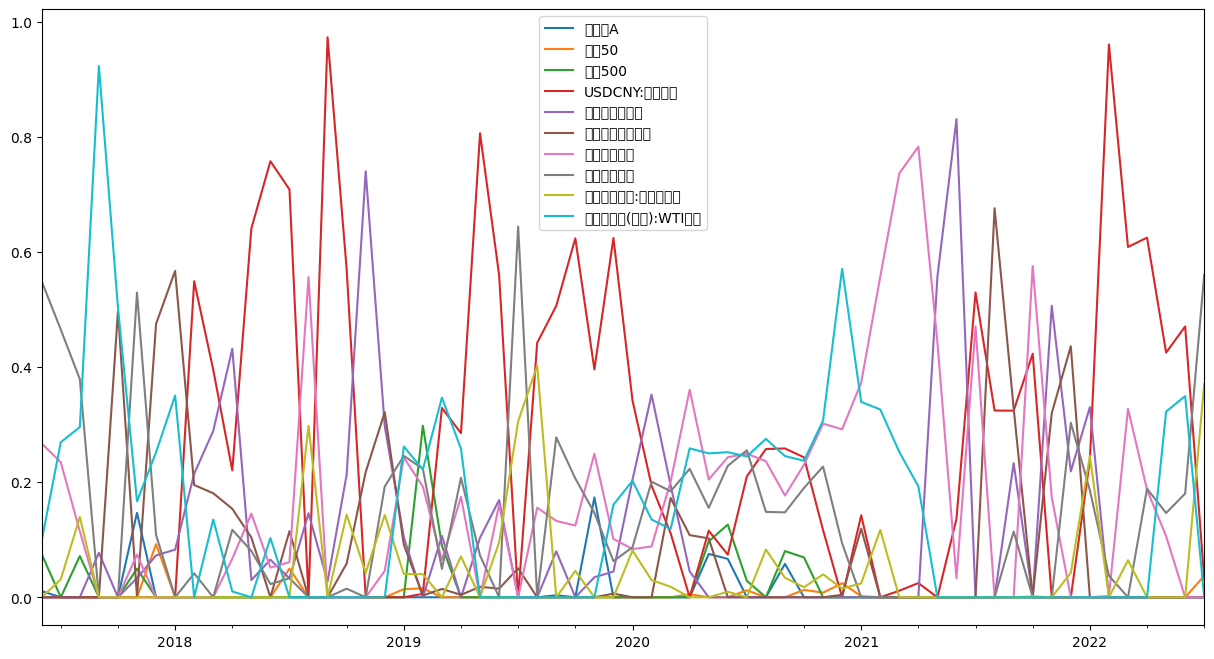

In [3]:
pos = utils_eda.trans_columns_name(port_position)
pos.plot(figsize=(15, 8))

<AxesSubplot:>

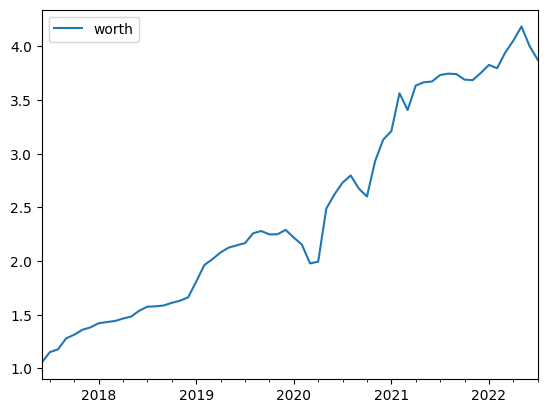

In [4]:
port_worth.plot()

<AxesSubplot:>

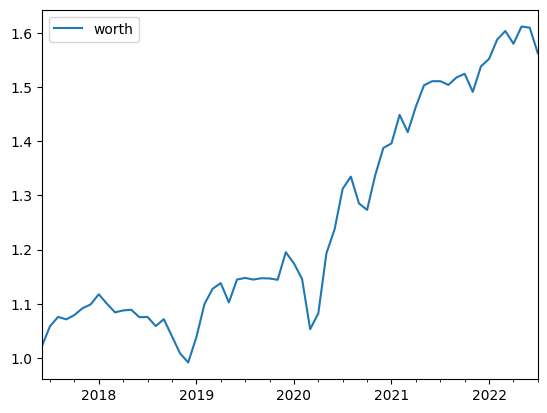

In [6]:
bench_worth.plot()

In [ ]:
imp.reload(evaluator)

In [ ]:
imp.reload(utils.eda)

In [ ]:
from evaluator import Evaluator